In [2720]:
import pandas as pd
import numpy as np

In [2721]:
pd.set_option('display.max_columns', None)


In [2722]:
#import history data for training and testing
df = pd.read_csv('D:/DKU大三学习/Stats 302/Final Project/Players.csv')


In [2723]:
#import 2022 MVP candidates for prediction
df_2022 = pd.read_csv('D:/DKU大三学习/Stats 302/Final Project/2022.csv')
df_2022

,year,player,age,team,games,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,W,L,W/L,seed
0,2022,Nikola Jokic,27,DEN,57,33.1,25.8,13.8,8.0,1.4,0.8,0.571,0.363,0.811,11.7,0.299,38,26,0.594,10
1,2022,Giannis Antetokounmpo,27,MIL,54,32.8,29.2,11.6,6.0,1.0,1.4,0.544,0.296,0.722,10.6,0.288,40,25,0.615,8
2,2022,Joel Embiid,27,PHI,51,33.1,29.5,11.2,4.4,1.1,1.4,0.490,0.351,0.822,9.2,0.262,39,24,0.619,11
3,2022,Chris Paul,36,PHO,58,33.0,14.9,4.5,10.7,1.9,0.3,0.487,0.330,0.843,8.5,0.212,51,13,0.797,1
4,2022,Rudy Gobert,29,UTA,49,32.1,15.7,14.8,1.2,0.7,2.2,0.711,0.000,0.682,8.8,0.270,40,23,0.635,3
5,2022,James Harden,32,PHI,48,36.5,22.9,7.9,10.3,1.3,0.6,0.425,0.344,0.872,1.4,0.461,39,24,0.619,11
6,2022,Luka Doncic,23,DAL,48,35.6,27.8,9.2,8.8,1.2,0.5,0.450,0.332,0.739,5.1,0.143,39,25,0.609,9
7,2022,Ja Morant,22,MEM,52,33.3,27.6,5.8,6.6,1.2,0.4,0.494,0.343,0.761,6.4,0.177,44,22,0.667,6
8,2022,Stephen Curry,33,GSW,59,34.8,25.8,5.2,6.4,1.3,0.4,0.432,0.379,0.918,7.7,0.180,43,21,0.672,2
9,2022,Devin Booker,25,PHO,54,34.4,25.6,5.2,4.6,1.1,0.4,0.448,0.368,0.864,5.2,0.134,51,13,0.797,1


In [2724]:
df = df.drop('Unnamed: 0',axis = 1)
df.head()

,year,rank,player,age,team,award_share,games,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,W,L,W/L,seed,MVP
0,1980,1,Kareem Abdul-Jabbar,32,LAL,0.665,82,38.3,24.8,10.8,4.5,1.0,3.4,0.604,0,0.765,14.8,0.227,60,22,0.732,2,T
1,1980,2,Julius Erving,29,PHI,0.143,78,36.1,26.9,7.4,4.6,2.2,1.8,0.519,0.2,0.787,12.5,0.213,59,23,0.720,3,F
2,1980,3,George Gervin,27,SAS,0.086,78,37.6,33.1,5.2,2.6,1.4,1.0,0.528,0.314,0.852,10.6,0.173,41,41,0.500,10,F
3,1980,4,Larry Bird,23,BOS,0.068,82,36.0,21.3,10.4,4.5,1.7,0.6,0.474,0.406,0.836,11.2,0.182,61,21,0.744,1,F
4,1980,5T,Tiny Archibald,31,BOS,0.009,80,35.8,14.1,2.5,8.4,1.3,0.1,0.482,0.222,0.830,8.9,0.148,61,21,0.744,1,F


In [2725]:
#select features for building model
X = df.drop(['year','rank','team','award_share','MVP'],axis = 1)

In [2726]:
#see the types of X
X.dtypes

player        object
age            int64
games          int64
mp_per_g     float64
pts_per_g    float64
trb_per_g    float64
ast_per_g    float64
stl_per_g    float64
blk_per_g    float64
fg_pct       float64
fg3_pct       object
ft_pct       float64
ws           float64
ws_per_48    float64
W              int64
L              int64
W/L          float64
seed           int64
dtype: object

In [2727]:
X['fg3_pct'] = pd.to_numeric(X['fg3_pct'],errors='coerce')

In [2728]:
#check for null values
X.isnull().sum()

player        0
age           0
games         0
mp_per_g      0
pts_per_g     0
trb_per_g     0
ast_per_g     0
stl_per_g     0
blk_per_g     0
fg_pct        0
fg3_pct      25
ft_pct        0
ws            0
ws_per_48     0
W             0
L             0
W/L           0
seed          0
dtype: int64

In [2729]:
#prepare Y 
Y = pd.DataFrame(np.c_[df['player'],df['MVP'],df['award_share']],columns = ['player','MVP','award_share'])

In [2730]:
Y

,player,MVP,award_share
0,Kareem Abdul-Jabbar,T,0.665
1,Julius Erving,F,0.143
2,George Gervin,F,0.086
3,Larry Bird,F,0.068
4,Tiny Archibald,F,0.009
5,Dennis Johnson,F,0.009
6,Dan Roundfield,F,0.009
7,Gus Williams,F,0.007
8,Moses Malone,F,0.005
9,Julius Erving,T,0.658


In [2731]:
#prepare faetures of 2022 candidates for prediction and see the data types
X_2022 = df_2022.drop(['year','team',],axis = 1)
X_2022.dtypes

player        object
age            int64
games          int64
mp_per_g     float64
pts_per_g    float64
trb_per_g    float64
ast_per_g    float64
stl_per_g    float64
blk_per_g    float64
fg_pct       float64
fg3_pct      float64
ft_pct       float64
ws           float64
ws_per_48    float64
W              int64
L              int64
W/L          float64
seed           int64
dtype: object

In [2732]:
#prepare the data for classification by deleting the player column ffrom X
X_class = X.iloc[:,1:]

In [2733]:
#prepare the data for classification by leaving only the MVP labels column
Y_class = Y.iloc[:,1]

In [2734]:
X_2022_reg = X_2022.iloc[:,1:]

In [3562]:
#using train_test_split function to do a 0.6/0.4 train test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_class, Y_class, test_size = 0.4)

In [3563]:
#place the nan values of train and test data by the mean
train_mean_value = X_train['fg3_pct'].mean()
X_train['fg3_pct'].fillna(value = train_mean_value, inplace = True)

C:\Users\Renyu\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [3564]:
#check again for nan data
X_train.isnull().sum()

age          0
games        0
mp_per_g     0
pts_per_g    0
trb_per_g    0
ast_per_g    0
stl_per_g    0
blk_per_g    0
fg_pct       0
fg3_pct      0
ft_pct       0
ws           0
ws_per_48    0
W            0
L            0
W/L          0
seed         0
dtype: int64

In [3565]:
#same for X_test
test_mean_value = X_test['fg3_pct'].mean()
X_test['fg3_pct'].fillna(value = test_mean_value, inplace = True)

In [3566]:
#standardize train and test features
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
X_train_norm = normalizer.fit_transform(X_train)


X_test_norm = normalizer.fit_transform(X_test)
#see the shape of standardized X_train
X_train_norm.shape

(411, 17)

In [3567]:
#standardize the 2022 MVP candidates data
normalizer = preprocessing.Normalizer()
X_2022_norm = normalizer.fit_transform(X_2022_reg)
X_2022_norm.shape

(10, 17)

In [3568]:
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score


In [3569]:
#create list for storing precision
train_precision = []
test_precision = []

In [3570]:
#use decision tree to classify MVP and not MVP
from sklearn.tree import DecisionTreeClassifier
# training of the decision tree, observe the many hyperparameters at your disposal
for i in range(2,10):
    tree_clf = DecisionTreeClassifier(max_depth=i, random_state = 42)
    tree_clf.fit(X_train_norm, Y_train)
    # normally we do not compute the accuracy on the training data.
    # here we want to demonstrate that a decision tree of unlimited depth will normally overfit
    Y_train_pred = tree_clf.predict(X_train_norm)
    Y_test_pred = tree_clf.predict(X_test_norm)
    #precision = make_scorer(precision_score, pos_label="T")
    #precision_score = cross_val_score(tree_clf, X_train_norm, Y_train, cv=5,scoring = 'precision')
    train_score = precision_score(Y_train,Y_train_pred,average="binary", pos_label="T")
    test_score = precision_score(Y_test,Y_test_pred,average="binary", pos_label="T")
    print('train precision for {:}: {:3f}'.format(i,train_score))
    print('test precision for {:}: {:3f}'.format(i,test_score))
    train_precision.append(train_score)
    test_precision.append(test_score)
    #print('recall for {:}: {:3f}'.format(i,recall_score(Y_test, Y_test_pred,average="binary", pos_label="T")))
    #print('accuracy for {:}: {:3f}'.format(i,accuracy_score(Y_test, Y_test_pred)))

train precision for 2: 0.928571
test precision for 2: 0.625000
train precision for 3: 0.944444
test precision for 3: 0.625000
train precision for 4: 1.000000
test precision for 4: 0.625000
train precision for 5: 1.000000
test precision for 5: 0.625000
train precision for 6: 0.962963
test precision for 6: 0.500000
train precision for 7: 1.000000
test precision for 7: 0.526316
train precision for 8: 1.000000
test precision for 8: 0.526316
train precision for 9: 1.000000
test precision for 9: 0.526316


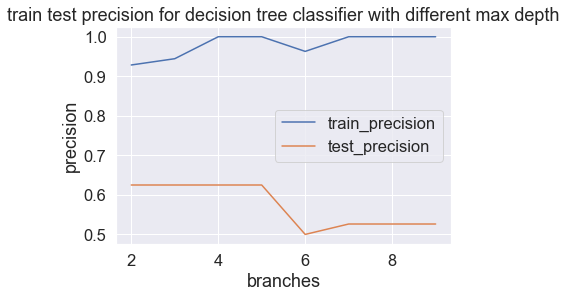

In [3571]:
#plot the image of train and test precision over different branches of  a tree
plt.plot(range(2,10),train_precision,label = 'train_precision')
plt.plot(range(2,10),test_precision,label = 'test_precision')
plt.title('train test precision for decision tree classifier with different max depth')
plt.xlabel('branches')
plt.ylabel('precision')
plt.legend()
plt.show()

In [3702]:
#choose the number of branch with highest test prescision to constrct optimized decision tree
tree_clf_opt = DecisionTreeClassifier(max_depth=4, random_state = 42)
tree_clf_opt.fit(X_train_norm, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [3703]:
#predict the test precision using test set
Y_test_pred = tree_clf_opt.predict(X_test_norm)

In [3704]:
#the test precision score
precision_score(Y_test,Y_test_pred,pos_label = 'T')

0.625

In [3707]:
#see how many are predicted true
df_compare = pd.DataFrame(np.c_[Y_test,Y_test_pred],
                         columns = ['True','Predicted'])

In [3708]:
(df_compare['Predicted']=='T').values.sum()

16

In [3709]:
#number of false positive
((df_compare['Predicted']=='T')&(df_compare['True']=='F')).values.sum()

6

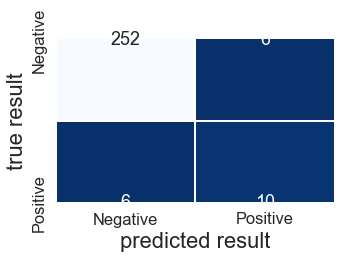

In [3710]:
#plot the confusion matrix
from sklearn import metrics
cm1 = metrics.confusion_matrix(Y_test, Y_test_pred)

# visualize as heatmap
import seaborn as sns
sns.set(font_scale=1.5) # set fontsize 2

plt.figure(figsize=(5,3))

x_axis_labels = ['Negative','Positive']
y_axis_labels = ['Negative','Positive']

sns.heatmap(cm1, annot=True, fmt=".0f",  linewidths=1, cmap='Blues_r', cbar=False,
            xticklabels=x_axis_labels,  yticklabels=y_axis_labels)

plt.ylabel('true result', size=22)
plt.xlabel('predicted result', size=22)

plt.show()

In [3705]:
#prediction of 2022 MVP using the model build above
Y_2022_pred = tree_clf_opt.predict(X_2022_norm)
Y_2022_pred

array(['F', 'F', 'F', 'T', 'F', 'F', 'F', 'F', 'F', 'F'], dtype=object)

In [3706]:
#the predicted MVP of 2022 season
df_2022_pred = pd.DataFrame(np.c_[df_2022['player'],Y_2022_pred],columns = ['candidates','predicted_MVP'])
df_2022_pred

,candidates,predicted_MVP
0,Nikola Jokic,F
1,Giannis Antetokounmpo,F
2,Joel Embiid,F
3,Chris Paul,T
4,Rudy Gobert,F
5,James Harden,F
6,Luka Doncic,F
7,Ja Morant,F
8,Stephen Curry,F
9,Devin Booker,F


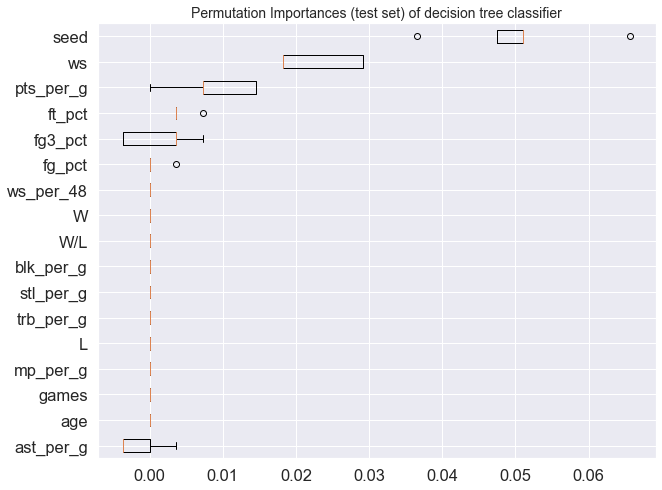

In [3712]:
# compute the permutation importance
result = permutation_importance(tree_clf_opt, X_test_norm, Y_test,
                                random_state=42)
sorted_idx = result.importances_mean.argsort()

# plot result as boxplot
fig, ax = plt.subplots(figsize = (10,8))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set) of decision tree classifier", size=14)

#plt.savefig('RF_permutation_importance_overfit.png')
plt.show()

In [4337]:
#using train_test_split function to do a 0.6/0.4 train test split
from sklearn.model_selection import train_test_split

X_train_ann, X_test_ann, Y_train_ann, Y_test_ann = train_test_split(X_class, Y_class, test_size = 0.3)

In [4338]:
#place the nan values of train and test data by the mean
train_mean_value = X_train_ann['fg3_pct'].mean()
X_train_ann['fg3_pct'].fillna(value = train_mean_value, inplace = True)

C:\Users\Renyu\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [4339]:
#same for X_test
test_mean_value = X_test_ann['fg3_pct'].mean()
X_test_ann['fg3_pct'].fillna(value = test_mean_value, inplace = True)

In [4340]:
#standardize train and test features
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
X_train_ann_norm = normalizer.fit_transform(X_train_ann)


X_test_ann_norm = normalizer.fit_transform(X_test_ann)
#see the shape of standardized X_train
X_train_ann_norm.shape

(479, 17)

In [4341]:
import tensorflow

In [4342]:
from tensorflow.keras.utils import to_categorical

In [4343]:
#apply smote to enlarge the imbalanced data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_smote, Y_train_smote = sm.fit_resample(X_train_ann_norm, Y_train_ann)


In [4344]:
Y_train_num = Y_train_smote.replace({'T':1,'F':0})
Y_test_num = Y_test_ann.replace({'T':1,'F':0})


In [4345]:
#Y_train_num = Y_train_ann.replace({'T':1,'F':0})
#Y_test_num = Y_test_ann.replace({'T':1,'F':0})

In [4346]:
#usse one hot encoder to transforme catogorical data to numerical data
Y_train_one_hot = to_categorical(Y_train_num)
Y_test_one_hot = to_categorical(Y_test_num)

In [4347]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import RMSprop, Adam

In [4365]:
# design a  simple neural network
model_simple = Sequential()
model_simple.add(Dense(256, activation='linear', input_shape=(17,)))
model_simple.add(LeakyReLU(alpha=0.1))
#Dropout(0.3)
model_simple.add(Dense(528, activation='linear'))
model_simple.add(LeakyReLU(alpha=0.1))
#Dropout(0.2)
model_simple.add(Dense(128, activation='linear'))
model_simple.add(LeakyReLU(alpha=0.1))
model_simple.add(Dense(64, activation='linear'))
model_simple.add(LeakyReLU(alpha=0.1))
#Dropout(0.4)
model_simple.add(Dense(32, activation='linear'))
model_simple.add(LeakyReLU(alpha=0.1))
model_simple.add(Dense(2, activation='sigmoid'))

model_simple.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_261 (Dense)            (None, 256)               4608      
_________________________________________________________________
leaky_re_lu_123 (LeakyReLU)  (None, 256)               0         
_________________________________________________________________
dense_262 (Dense)            (None, 528)               135696    
_________________________________________________________________
leaky_re_lu_124 (LeakyReLU)  (None, 528)               0         
_________________________________________________________________
dense_263 (Dense)            (None, 128)               67712     
_________________________________________________________________
leaky_re_lu_125 (LeakyReLU)  (None, 128)               0         
_________________________________________________________________
dense_264 (Dense)            (None, 64)              

In [4366]:
model_simple.compile(loss='binary_crossentropy',
              optimizer= Adam(),                             
              metrics=['accuracy'])

In [4367]:
# train the model
batch_size = 128
epochs = 128

#history simple will save our training results
history_simple = model_simple.fit(X_train_smote, Y_train_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,              
                    validation_data=(X_test_ann_norm, Y_test_one_hot))



Train on 912 samples, validate on 206 samples
Epoch 1/128
912/912 [==============================] - 1s 1ms/sample - loss: 0.6879 - accuracy: 0.5126 - val_loss: 0.6413 - val_accuracy: 0.9150
Epoch 2/128
912/912 [==============================] - 0s 44us/sample - loss: 0.6598 - accuracy: 0.6590 - val_loss: 0.5747 - val_accuracy: 0.8956
Epoch 3/128
912/912 [==============================] - 0s 39us/sample - loss: 0.5719 - accuracy: 0.8317 - val_loss: 0.4198 - val_accuracy: 0.8762
Epoch 4/128
912/912 [==============================] - 0s 48us/sample - loss: 0.4394 - accuracy: 0.8251 - val_loss: 0.2913 - val_accuracy: 0.8762
Epoch 5/128
912/912 [==============================] - 0s 42us/sample - loss: 0.3289 - accuracy: 0.8646 - val_loss: 0.2932 - val_accuracy: 0.8689
Epoch 6/128
912/912 [==============================] - 0s 42us/sample - loss: 0.2761 - accuracy: 0.8909 - val_loss: 0.2906 - val_accuracy: 0.8689
Epoch 7/128
912/912 [==============================] - 0s 40us/sample - loss: 0

In [4368]:
# evaluate model performance
score = model_simple.evaluate(X_test_ann, Y_test_one_hot, verbose=0)
print("Test loss: {:.4f}".format(score[0]))
print("Test accuracy: {:.4f}".format(score[1]))
# for comparison, we had
# 0.9190 accuracy with logistic regeression and l2 regularization
# 0.9662 accuracy with random forest of 40 trees

Test loss: 26.7098
Test accuracy: 0.9272


In [4369]:
#predict the output of test set
Y_test_pred = model_simple.predict(X_test_ann_norm)

In [4370]:
Y_test_out = []

In [4371]:
#turn numerical value back to categorical 
for i in range(len(Y_test_pred)):
    if(Y_test_pred[i,0]>0.5):
        Y_test_out.append(0)
    else:
        Y_test_out.append(1)

In [4373]:
#precision score of the ann model
precision_score(Y_test_num,Y_test_out)

0.5833333333333334

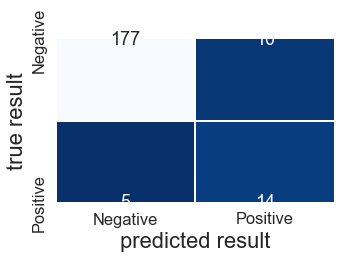

In [4374]:
#confusion matrix 
from sklearn import metrics
cm1 = metrics.confusion_matrix(Y_test_num, Y_test_out)

# visualize as heatmap
import seaborn as sns
sns.set(font_scale=1.5) # set fontsize 2

plt.figure(figsize=(5,3))

x_axis_labels = ['Negative','Positive']
y_axis_labels = ['Negative','Positive']

sns.heatmap(cm1, annot=True, fmt=".0f",  linewidths=1, cmap='Blues_r', cbar=False,
            xticklabels=x_axis_labels,  yticklabels=y_axis_labels)

plt.ylabel('true result', size=22)
plt.xlabel('predicted result', size=22)

plt.show()

In [4375]:
Y_2022_out = []

In [4376]:
#predict the winer of 2022 candidates
Y_2022_pred = model_simple.predict(X_2022_norm)

In [4377]:
Y_2022_pred[1]

array([0.7494985 , 0.24455413], dtype=float32)

In [4378]:
#turn numerical value back to categorical 
for i in range(len(Y_2022_pred)):
    if(Y_2022_pred[i][0]>0.5):
        Y_2022_out.append(0)
    else:
        Y_2022_out.append(1)

In [4379]:
Y_2022_out

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [4380]:
df_2022_ann = pd.DataFrame(np.c_[df_2022['player'],Y_2022_out],columns = ['player','predicted MVP'])

In [4381]:
#construct the final data frame
df_2022_ann = df_2022_ann.replace({1:'T',0:'F'})
df_2022_ann

,player,predicted MVP
0,Nikola Jokic,T
1,Giannis Antetokounmpo,F
2,Joel Embiid,F
3,Chris Paul,F
4,Rudy Gobert,F
5,James Harden,F
6,Luka Doncic,F
7,Ja Morant,F
8,Stephen Curry,F
9,Devin Booker,F
